In [1]:
import os
import gym
import imageio
import pybullet_envs
import PIL.Image
import pybullet
import pybullet_data
from reinforcement_learning import labeling_functions
labeling_function = labeling_functions['HumanoidBulletEnv-v0']
# Pybullet testing environment
import PIL.Image
import os
# Important: pybullet should be charged only once !!
from tf_agents.environments import suite_pybullet, parallel_py_environment
from tf_agents.environments import tf_py_environment
from tf_agents.trajectories.trajectory import Trajectory
from tf_agents.networks import actor_distribution_network
from tf_agents.drivers import dynamic_episode_driver, dynamic_step_driver
from tf_agents.policies import random_tf_policy
import tensorflow as tf

/home/florent/anaconda3/envs/vae_mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


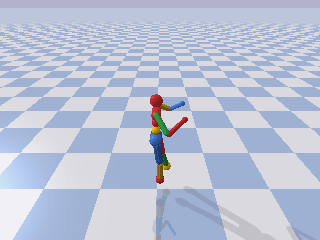

In [2]:
py_env = suite_pybullet.load('HumanoidBulletEnv-v0')
py_env.render(mode='human')
py_env.reset()
PIL.Image.fromarray(py_env.render())

In [3]:
class StatePrinter:
    def __init__(self):
        self.x = 0
    def __call__(self, trajectory):
        self.x += 1
        self.x %= 10
        if self.x == 0:
            observation = trajectory.observation
            print('state:', observation)
            print('labels:', labeling_function(observation))


tf_env = tf_py_environment.TFPyEnvironment(py_env)
stochastic_policy_dir = '../saves/HumanoidBulletEnv-v0/policy/'
policy = tf.saved_model.load(stochastic_policy_dir)
dynamic_episode_driver.DynamicEpisodeDriver(
    tf_env, policy, num_episodes=15, observers=[StatePrinter()]).run()



state: tf.Tensor(
[[ 4.7108221e-01 -3.5187376e-01  9.3604749e-01  1.1288818e-01
   6.4597547e-02 -5.0161618e-01 -4.6726249e-02 -2.1761580e-01
  -7.4353339e-03 -1.3331038e-01  8.0751854e-01  4.3465400e-01
   1.6201191e-01  1.6185328e-01  9.1439933e-01  1.2211269e-01
  -5.0187200e-01 -1.1233381e-01  2.7825984e-01 -5.0555831e-01
   1.3322467e-01 -5.9700119e-01  1.0005196e+00 -8.2459720e-04
  -1.3102569e-01 -4.4734305e-01  6.1985439e-01 -1.1718390e-01
   1.0000007e+00 -5.8228243e-06  2.0543936e-01  2.3584323e-02
  -2.4526455e-01 -8.8832426e-01 -1.0586009e+00  1.4011758e-09
  -3.8533947e-01 -3.2913911e-01 -5.5379319e-01 -1.9643830e-01
  -1.0461104e+00  1.7324883e-08  0.0000000e+00  0.0000000e+00]], shape=(1, 44), dtype=float32)
labels: tf.Tensor([[False False False  True]], shape=(1, 4), dtype=bool)
state: tf.Tensor(
[[ 2.94342786e-01 -5.55309355e-01  8.31643879e-01  2.18145281e-01
  -2.51505435e-01 -6.62705004e-02 -3.64641041e-01 -2.62239814e-01
  -1.72142517e-02 -5.38518250e-01  1.0017786

(TimeStep(step_type=<tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>, reward=<tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.], dtype=float32)>, discount=<tf.Tensor: shape=(1,), dtype=float32, numpy=array([1.], dtype=float32)>, observation=<tf.Tensor: shape=(1, 44), dtype=float32, numpy=
 array([[ 5.9999996e-01,  9.1437714e-06,  1.0000000e+00,  0.0000000e+00,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -0.0000000e+00,
          1.2719768e-01,  0.0000000e+00,  3.6280736e-01,  0.0000000e+00,
         -4.1700616e-02,  0.0000000e+00,  5.7273841e-01,  0.0000000e+00,
          3.0783337e-01,  0.0000000e+00,  7.1569347e-01,  0.0000000e+00,
          1.0805938e+00,  0.0000000e+00,  9.8042631e-01,  0.0000000e+00,
          3.0853361e-01,  0.0000000e+00,  7.4290770e-01,  0.0000000e+00,
          9.9946618e-01,  0.0000000e+00,  2.0916566e-01,  0.0000000e+00,
          2.0312969e-01,  0.0000000e+00,  2.6259324e-01,  0.0000000e+00,
         -1.4259467e-01,  0.0

In [2]:
# Parallel environments.
num_parallel_environments = 4
tf_env = tf_py_environment.TFPyEnvironment(parallel_py_environment.ParallelPyEnvironment(
    [lambda : suite_pybullet.load('HumanoidBulletEnv-v0')] * num_parallel_environments))
tf_env.reset()

/home/florentdelgrange/anaconda3/envs/vae-mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/florentdelgrange/anaconda3/envs/vae-mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/florentdelgrange/anaconda3/envs/vae-mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))
/home/florentdelgrange/anaconda3/envs/vae-mdp/lib/python3.7/site-packages/gym/logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide

TimeStep(step_type=<tf.Tensor: shape=(4,), dtype=int32, numpy=array([0, 0, 0, 0], dtype=int32)>, reward=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>, discount=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>, observation=<tf.Tensor: shape=(4, 44), dtype=float32, numpy=
array([[ 5.9999996e-01,  9.2012087e-06,  1.0000000e+00,  0.0000000e+00,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00, -0.0000000e+00,
        -8.4347658e-02,  0.0000000e+00,  4.9782762e-01,  0.0000000e+00,
        -1.5650268e-01,  0.0000000e+00,  6.6706383e-01,  0.0000000e+00,
         2.7644044e-01,  0.0000000e+00,  7.6475137e-01,  0.0000000e+00,
         1.0315669e+00,  0.0000000e+00,  3.3479026e-01,  0.0000000e+00,
         1.8095379e-01,  0.0000000e+00,  7.2646117e-01,  0.0000000e+00,
         1.0932105e+00,  0.0000000e+00,  2.4763696e-01,  0.0000000e+00,
         2.5020656e-01,  0.0000000e+00,  2.7137965e-01,  0.0000000e+00,
      

In [3]:
replay_buffer_size = 12800

# create a dataset
from tf_agents.agents.reinforce import reinforce_agent
from tf_agents.replay_buffers import tf_uniform_replay_buffer
actor_net = actor_distribution_network.ActorDistributionNetwork(
    tf_env.observation_spec(),
    tf_env.action_spec(),
    fc_layer_params=(128, 128))
policy = random_tf_policy.RandomTFPolicy(tf_env.time_step_spec(), tf_env.action_spec())
train_step_counter = tf.compat.v2.Variable(0)

agent = reinforce_agent.ReinforceAgent(
    tf_env.time_step_spec(),
    tf_env.action_spec(),
    actor_network=actor_net,
    optimizer=tf.compat.v1.train.AdamOptimizer(learning_rate=1e-4),
    normalize_returns=True,
    train_step_counter=train_step_counter)
agent.initialize()

replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(
    data_spec=agent.collect_data_spec,
    batch_size=tf_env.batch_size,
    max_length=replay_buffer_size)
whole_dataset = replay_buffer.as_dataset(num_parallel_calls=3, sample_batch_size=replay_buffer_size, num_steps=3)

random_policy = random_tf_policy.RandomTFPolicy(tf_env.time_step_spec(), tf_env.action_spec())
dynamic_step_driver.DynamicStepDriver(tf_env, random_policy,
                                      observers=[replay_buffer.add_batch], num_steps=replay_buffer_size).run()


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


(TimeStep(step_type=<tf.Tensor: shape=(4,), dtype=int32, numpy=array([1, 1, 1, 1], dtype=int32)>, reward=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-2.5384243, -0.9994545, -1.3221866, -4.84467  ], dtype=float32)>, discount=<tf.Tensor: shape=(4,), dtype=float32, numpy=array([1., 1., 1., 1.], dtype=float32)>, observation=<tf.Tensor: shape=(4, 44), dtype=float32, numpy=
 array([[ 0.41176334, -0.2789402 ,  0.9603085 ,  0.00863498,  0.05806908,
         -0.759165  , -0.15419166,  0.20408311, -0.7107086 ,  1.1116505 ,
          0.4178036 , -0.61616814,  0.52912843,  0.2858384 ,  0.9821978 ,
          0.20272146,  0.22775355, -1.4387232 , -0.30971187, -1.2928632 ,
         -0.11986443, -2.1810336 ,  0.24825212,  0.0512737 ,  0.94758   ,
          2.7920022 ,  0.586587  , -0.51935333,  0.78832793, -0.96389645,
          0.18246822, -0.16469318, -0.21625288, -0.04163652,  0.97070974,
          1.6089721 , -0.19109546,  0.18365687, -0.6443071 , -0.04858434,
         -0.67030716,  0.1341

In [4]:
def labeling_function(states):
    return states[..., 0] + 0.8 <= 0.78

In [5]:
import tf_agents.trajectories.time_step as ts

scalar_rewards = True
dataset = replay_buffer.as_dataset(
    num_parallel_calls=tf.data.experimental.AUTOTUNE,
    num_steps=2,).prefetch(tf.data.experimental.AUTOTUNE)

iterator = iter(dataset)
raw_data, b = next(iterator)

states = raw_data.observation[0, :]
actions = raw_data.action[0, :]
rewards = raw_data.reward[0]
next_states = raw_data.observation[1, :]
first_labels = tf.cast(labeling_function(states), tf.float32)
next_labels = tf.cast(labeling_function(next_states), tf.float32)
labels = tf.cast(labeling_function(raw_data.observation), tf.float32)

states, actions, rewards, next_states, first_labels, next_labels, labels
raw_data.reward, raw_data.reward[0, ...]

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([-2.4801683, -1.9745685], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-2.4801683>)

In [5]:
from util.io.dataset_generator import map_rl_trajectory_to_vae_input

dataset_generator = lambda: replay_buffer.as_dataset(
    num_parallel_calls=tf.data.experimental.AUTOTUNE,
    num_steps=2
).map(
    map_func=lambda trajectory, _: map_rl_trajectory_to_vae_input(trajectory, labeling_function),
    num_parallel_calls=tf.data.experimental.AUTOTUNE,
    #  deterministic=False  # TF version >= 2.2.0
)
dataset = dataset_generator().batch(batch_size=128, drop_remainder=True)
dataset_iterator = iter(dataset.prefetch(tf.data.experimental.AUTOTUNE))
next(dataset_iterator)

(<tf.Tensor: shape=(128, 44), dtype=float32, numpy=
 array([[ 4.7232839e-01, -1.7611326e-01,  9.8436993e-01, ...,
         -5.0841606e-01,  0.0000000e+00,  0.0000000e+00],
        [ 1.1732262e-01, -9.6525276e-01,  2.6131800e-01, ...,
         -1.5835127e+00,  0.0000000e+00,  0.0000000e+00],
        [ 3.4838113e-01, -6.0660309e-01,  7.9500484e-01, ...,
         -1.3338916e+00,  0.0000000e+00,  0.0000000e+00],
        ...,
        [ 5.9999996e-01, -1.6793409e-05,  1.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
        [-2.2671875e-02, -1.5902920e-01,  9.8727387e-01, ...,
          2.0993819e+00,  0.0000000e+00,  1.0000000e+00],
        [-5.7793405e-02,  6.2928128e-01,  7.7717763e-01, ...,
         -7.6214999e-01,  0.0000000e+00,  0.0000000e+00]], dtype=float32)>,
 <tf.Tensor: shape=(128, 1), dtype=float32, numpy=
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [ ]:
state_type = raw_data.step_type[:2]
next_state_type = raw_data.next_step_type[:2]

# remove transitions where the incident state is terminal and next state is initial
# note: such transitions correspond to those where the reset() function has been called
filtering = state_type[0] != ts.StepType.LAST
filtering &= state_type[1] != ts.StepType.LAST
filtering &= next_state_type[0] != ts.StepType.FIRST
filtering &= next_state_type[1] != ts.StepType.FIRST
filtering = tf.reduce_all(filtering)

print("filtering", filtering)
print("state_type", state_type)
print("next_state_type", next_state_type)

states = raw_data.observation[:2, :]
actions = raw_data.action[:2, :]
rewards = raw_data.reward[:2] if scalar_rewards else reward[:2, :]
if scalar_rewards:
    rewards = tf.reshape(rewards, list(rewards.shape) + [1])
next_states = raw_data.observation[1:, :]
next_labels = labeling_function(next_states)
if next_labels.shape == states.shape[:-1]:
    next_labels = tf.reshape(next_labels, list(next_labels.shape) + [1])

print("states", states)
print("next_states", next_states)
print("rewards", rewards)
print("next_labels", next_labels)

In [ ]:
import h5py
import tf_agents.trajectories.time_step as ts
import datetime

dataset_path = 'dataset'
iterator = iter(dataset)
current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

if not os.path.exists(dataset_path):
    os.makedirs(dataset_path)
with h5py.File(dataset_path + '/rl_exploration' + current_time + '.hdf5', 'w') as h5f:
    data = iterator.next()[0]
    states = data.observation[:, :2, :].numpy()
    actions = data.action[:, :2, :].numpy()
    rewards = data.reward[:, :2].numpy()
    next_states = data.observation[:, 1:, :].numpy()
    next_labels = labeling_function(next_states)
    # 0: initial state; 1: mid state; 2: terminal state
    state_type = data.step_type[:, :2].numpy()
    next_state_type = data.next_step_type[:, :2].numpy()

    # remove transitions where the incident state is terminal and next state is initial
    filtering = state_type[:, 0] != ts.StepType.LAST
    filtering &= state_type[:, 1] != ts.StepType.LAST
    filtering &= next_state_type[:, 0] != ts.StepType.FIRST
    filtering &= next_state_type[:, 1] != ts.StepType.FIRST

    h5f['state'] = states[filtering]
    h5f['action'] = actions[filtering]
    h5f['reward'] = rewards[filtering]
    h5f['next_state'] = next_states[filtering]
    h5f['next_state_label'] = next_labels[filtering]
    # 0: initial state; 1: mid state; 2: terminal state
    h5f['state_type'] = state_type[filtering]
    h5f['next_state_type'] = state_type[filtering]

In [ ]:
from typing import List, Dict, Tuple
import glob
import os

file_list: List[str] = glob.glob(os.path.join(dataset_path, 'rl_*')) + \
                       glob.glob(os.path.join(dataset_path, 'reinforcement_learning', 'rl_*'))
print("File list:")
print(file_list)

length: int = 0
h5f_indices: Dict[str, Tuple[int, int]] = {}
shape: Dict[str, Tuple[int, ...]] = {}
dataset_name = 'rl_observation_dataset.hdf5'

for h5f_name in file_list:
    with h5py.File(h5f_name, 'r') as h5f:
        h5f_length = h5f['state'].shape[0]  # we assume that all h5f datasets have the same length (= size of axis 0)
        h5f_indices[h5f_name] = (length, length + h5f_length)
        length += h5f_length

for i, h5f_name in enumerate(file_list):
    with h5py.File(h5f_name, 'r') as h5f:
        with h5py.File(os.path.join(dataset_path, dataset), 'w') as merged_h5f:
            for key in h5f:
                if i == 0:  # dataset file initialization
                    shape[key] = (length, ) + h5f[key].shape[1:]
                    merged_h5f.create_dataset(key, shape[key], dtype=h5f[key].dtype)
                first, last = h5f_indices[h5f_name]
                merged_h5f[key][first: last] = h5f[key]

print("Dataset files merged")

In [ ]:
class generator:
    def __init__(self, file):
        self.file = file

    def __call__(self):
        with h5py.File(self.file, 'r') as hf:
            for (state, action, reward, next_state, label, state_type, next_state_type) in \
                zip(hf['state'], hf['action'], hf['reward'], hf['next_state'],
                    hf['next_state_label'], hf['state_type'], hf['next_state_type']):
                yield state, action, reward, next_state, label, state_type, next_state_type

    def get_tensor_shape(self):
        with h5py.File(self.file, 'r') as hf:
           return (tf.TensorShape(hf['state'].shape[1:]),
                   tf.TensorShape(hf['action'].shape[1:]),
                   tf.TensorShape(hf['reward'].shape[1:]),
                   tf.TensorShape(hf['next_state'].shape[1:]),
                   tf.TensorShape(hf['next_state_label'].shape[1:]),
                   tf.TensorShape(hf['state_type'].shape[1:]),
                   tf.TensorShape(hf['next_state_type'].shape[1:]))

gen = generator(dataset_path + '/rl_exploration.hdf5')
loaded_dataset = tf.data.Dataset.from_generator(gen,
                                                (tf.float32, tf.float32, tf.float32, tf.float32, tf.bool, tf.int8, tf.int8),
                                                gen.get_tensor_shape())

In [ ]:
for state, action, reward, next_state, label, state_type, next_state_type in loaded_dataset:
    if label[0]:
        print(label[0], next_state[0], next_state_type)
    if label[1]:
        print(label[1], next_state[1], next_state_type)
    if state_type[0] == ts.StepType.LAST:
        print("BAD STATE S0:", state[0])
    if state_type[1] == ts.StepType.LAST:
        print("BAD STATE S0:", state[1])


In [ ]:
ts.StepType.FIRST # initial state
ts.StepType.LAST # terminal state
ts.StepType.MID # normal state

In [ ]:
x = data.step_type[:, 0] != ts.StepType.LAST
x &= data.step_type[:, 1] != ts.StepType.LAST
x.numpy()

In [ ]:
y = data.observation[:, :2, :].numpy()
z = y[x]
z


In [ ]:
from reinforcement_learning import sac_training, labeling_functions

learner = sac_training.SACLearner(
    env_name='HumanoidBulletEnv-v0',
    env_suite=suite_pybullet,
    labeling_function=labeling_functions['HumanoidBulletEnv-v0'],
    save_directory_location='..'
)

In [ ]:
variance_multiplier = 2.

In [ ]:
learner.save_permissive_variance_policy(variance_multiplier=variance_multiplier)

In [ ]:
import os
from tf_agents.environments import suite_pybullet, parallel_py_environment
from tf_agents.environments import tf_py_environment
from tf_agents.drivers import dynamic_episode_driver, dynamic_step_driver
import tensorflow as tf

In [ ]:
py_env = suite_pybullet.load('HumanoidBulletEnv-v0')
py_env.render(mode='human')
py_env.reset()
tf_env = tf_py_environment.TFPyEnvironment(py_env)

In [ ]:
from reinforcement_learning.sac_training import NumberOfSafetyViolations
from reinforcement_learning import labeling_functions
stochastic_policy_dir = os.path.join(
    '..',
    'saves',
    'HumanoidBulletEnv-v0',
    'policy',
    "permissive_variance_policy-multiplier={}".format(
        variance_multiplier)
)
policy = tf.compat.v2.saved_model.load(stochastic_policy_dir)
safety_violations = NumberOfSafetyViolations(
    labeling_function=labeling_functions['HumanoidBulletEnv-v0'])

dynamic_episode_driver.DynamicEpisodeDriver(
    tf_env,
    policy,
    num_episodes=30,
    observers=[
        lambda _: py_env.render(mode='human'),
        safety_violations
    ]
).run()

print("avg number of safety violations per episode", safety_violations.average())
